Importing Dependencies  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

Matplotlib is building the font cache; this may take a moment.


Data Cleaning and Processing

In [14]:
#loading dataset from the kaggle
car_dataset = pd.read_csv("car data.csv")

In [15]:
#printing the 1st 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
#checking the number of rows and columns
car_dataset.shape

(301, 9)

In [19]:
#getting some information about this dataframe
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
#checking the number of missing values
car_dataset.isnull().sum(
    
)

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [21]:
#checking the distribution of categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


Encoding the categorical Data

In [23]:
#encoding "Fuel_Type" Column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1,'CNG':2}},inplace=True)

#encoding "Seller_type" column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)

#encoding "Transmission" Column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_14768\591529594.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}},inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_14768\591529594.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1}},inplace=True)


In [24]:
print(car_dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          0   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          0   
3  wagon r  2011           2.85           4.15        5200          0   
4    swift  2014           4.60           6.87       42450          1   

   Seller_Type  Transmission  Owner  
0            0             0      0  
1            0             0      0  
2            0             0      0  
3            0             0      0  
4            0             0      0  


Splitting the data and target
column drop garna cha bhaney axis value 1
row = 0 

In [26]:
X = car_dataset.drop(['Car_Name','Selling_Price'], axis=1)
Y = car_dataset["Selling_Price"]


In [27]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [28]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


Splitting Training and Test Data

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=2 )

Model Training

1.Linear Regression

In [29]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [32]:
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

Model Evaluation

In [33]:
#prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)

In [34]:
#R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square error :",error_score)

R square error : 0.8799451660493699


Visualize the actual Prices and Predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

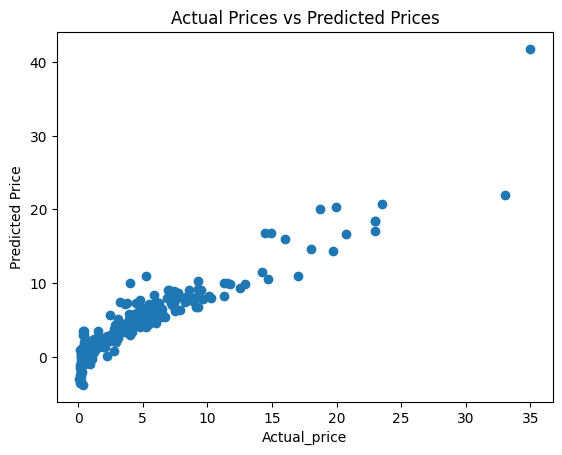

In [35]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

In [37]:
#prediction on Training data
test_data_prediction = lin_reg_model.predict(X_test)

In [38]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.8365766715026473


<function matplotlib.pyplot.show(close=None, block=None)>

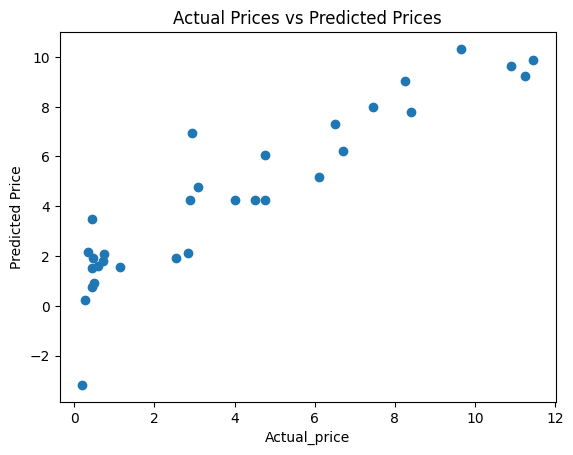

In [39]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

2.Lasso Regression

1.Linear Regression

In [40]:
#loading the linear regression model
lass_reg_model=Lasso()

In [42]:
lass_reg_model.fit(X_train, Y_train)


Lasso()

Model Evaluation

In [43]:
#prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [44]:
#R square error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R square error :",error_score)

R square error : 0.8427856123435795


Visualize the actual Prices and Predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

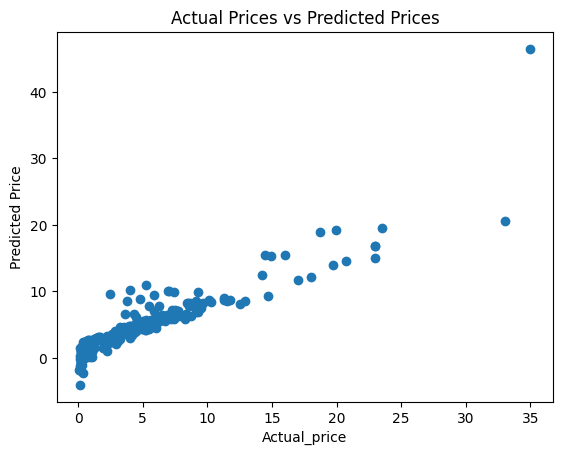

In [45]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show

In [49]:
#prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [50]:
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error:", error_score)

R squared Error: 0.8709167941173201


<function matplotlib.pyplot.show(close=None, block=None)>

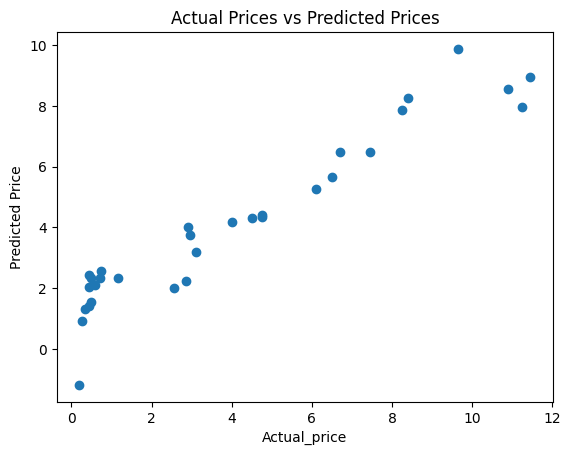

In [51]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual_price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show